For the task of Netflix Content Strategy Analysis, we need data based on content titles, type (show or movie), genre, language, and release details (date, day of the week, season) to understand timing and content performance. Viewership metrics like hours viewed are also crucial for measuring audience engagement.

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
df=pd.read_csv('netflix_content_2023.csv')

In [278]:
df.isnull().sum()

Title                      0
Available Globally?        0
Release Date           16646
Hours Viewed               0
Language Indicator         0
Content Type               0
dtype: int64

Large number of dataset doesn't have the release Date described


In [279]:
df.shape

(24812, 6)

24812 rows and 6 columns are there in the dataset

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [281]:
df['Language Indicator'].unique()

array(['English', 'Korean', 'Non-English', 'Japanese', 'Hindi', 'Russian'],
      dtype=object)

There are 6 language in which the shows/movie are released.

In [282]:
df['Content Type'].unique()

array(['Show', 'Movie'], dtype=object)

There are 2 kind of the content one is movie and other is show.

In [283]:
df

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie
...,...,...,...,...,...,...
24807,We Are Black and British: Season 1,No,NaN,"1,00,000",English,Show
24808,Whitney Cummings: Can I Touch It?,Yes,2019-07-30,"1,00,000",English,Movie
24809,Whitney Cummings: Jokes,No,2022-07-26,"1,00,000",English,Movie
24810,"Whose Vote Counts, Explained: Limited Series",Yes,2020-09-28,"1,00,000",English,Movie


In [284]:
df['Hours Viewed']=df['Hours Viewed'].str.replace(',','')
df['Hours Viewed']=df['Hours Viewed'].astype(float)

In [285]:
df.groupby(by='Content Type')['Hours Viewed'].sum()

Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64

([0, 1], [Text(0, 0, 'Movie'), Text(1, 0, 'Show')])

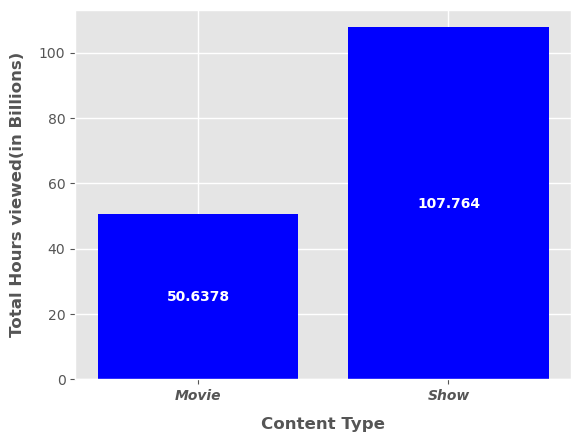

In [286]:
temp=df.groupby(by='Content Type')['Hours Viewed'].sum()
plt.style.use('ggplot')
X=temp.index
Y=temp.values/pow(10,9)
bars=plt.bar(x=X,height=Y,color='blue')
plt.bar_label(bars,label_type='center',c='w',fontweight='bold')
plt.xlabel('Content Type',labelpad=10,fontweight='bold')
plt.ylabel('Total Hours viewed(in Billions)',labelpad=10,fontweight='bold')
plt.xticks(fontweight='bold',fontstyle='italic')

This shows that people have spent more hours in watching shows then movies

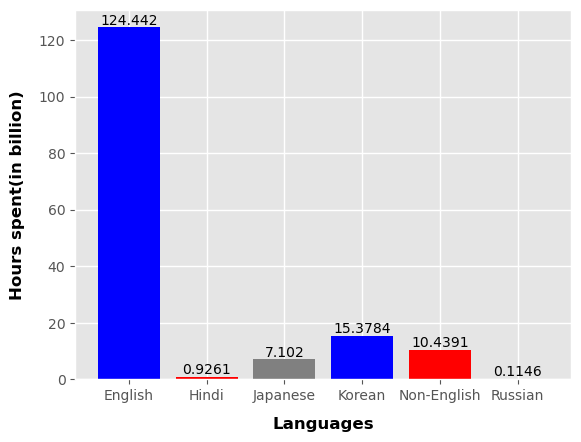

In [287]:
temp_table=df.groupby(by=['Language Indicator'])['Hours Viewed'].sum()
Y=temp_table.values/pow(10,9)
X=temp_table.index
plt.style.use('ggplot')
bars=plt.bar(x=X,height=Y,color=['b','r','grey'])
plt.bar_label(bars,label_type='edge',c='black')
plt.xlabel('Languages',fontweight='bold',color='black',labelpad=10)
plt.ylabel('Hours spent(in billion)',fontweight='bold',color='black',labelpad=10)
plt.show()

English language content has magnificiently dominates Netflix's Viewership.It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

In [336]:
df['Release Date'] = pd.to_datetime(df['Release Date'])

In [337]:
df['Release Month']=df['Release Date'].dt.month
## Addition of Month Column 

In [290]:
top_5_titles =df.nlargest(5, 'Hours Viewed')

- The Night Agent: Season 1(English show) with 812.1 million hours viewed.
- Ginny & Georgia: Season 2(English show) with 665.1 million hours viewed.
- King the Land: Limited Series(Korean Movie) with 630.2 million hours viewed.
- The Glory: Season 1(Korean show) with 622.8 million hours viewed.
- ONE PIECE: Season 1(English show) with 541.9 million hours viewed.

Text(0.5, 1.0, 'Total Viewership Hours by Release Month')

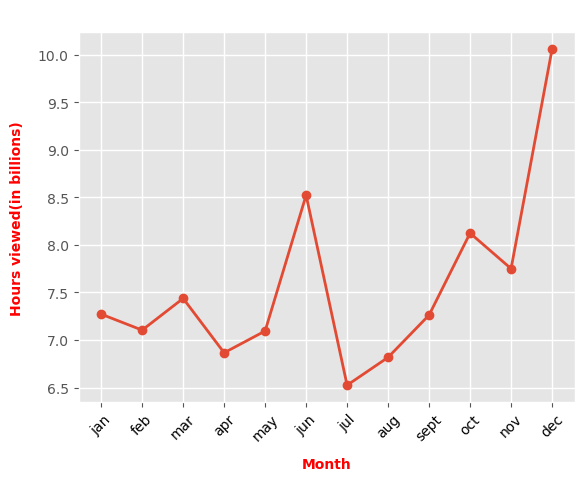

In [291]:

temp_table_month_trend=df.pivot_table(values='Hours Viewed',index='Release Month',aggfunc='sum',dropna=True)/pow(10,9)
plt.plot(temp_table_month_trend,marker='o')
month_names =['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sept', 'oct', 'nov', 'dec']
plt.xticks(ticks=range(1,13), labels=month_names, rotation=45,fontweight='medium',c='black')
plt.xlabel('Month',fontweight='bold',fontsize=10,labelpad=10,color='red')
plt.ylabel('Hours viewed(in billions)',fontweight='bold',fontsize=10,labelpad=10,color='red')
plt.yticks(fontweight='medium')
plt.title('Total Viewership Hours by Release Month')

An increase in Hours Viewed was observed during June and at the end of December, while a significant decline occurred in the middle months. This pattern might be attributed to seasonal changes.

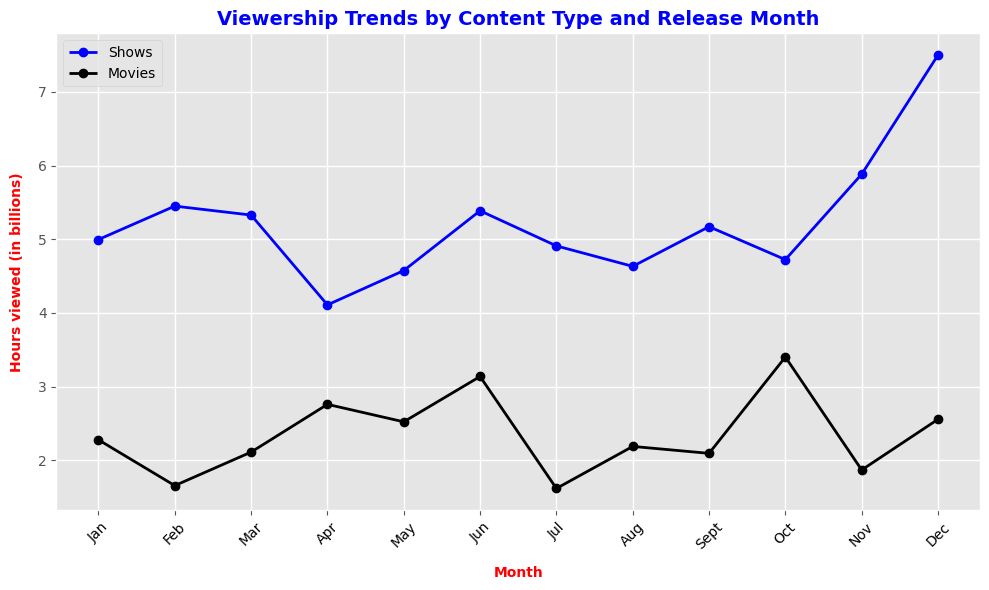

In [292]:
temp_shows = df[df['Content Type'] == 'Show'].groupby('Release Month')['Hours Viewed'].sum()/pow(10,9)
temp_movie = df[df['Content Type'] == 'Movie'].groupby('Release Month')['Hours Viewed'].sum()/pow(10,9)
X = temp_shows.index
plt.figure(figsize=(10, 6)) 
plt.plot(X, temp_shows, marker='o', color='b', label='Shows')
plt.plot(X, temp_movie, marker='o', color='black', label='Movies')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45, fontweight='medium', color='black')
plt.xlabel('Month', fontweight='bold', fontsize=10, labelpad=10, color='red')
plt.ylabel('Hours viewed (in billions)', fontweight='bold', fontsize=10, labelpad=10, color='red')
plt.yticks(fontweight='medium')
plt.title('Viewership Trends by Content Type and Release Month', fontweight='bold', fontsize=14, color='blue')
plt.legend(labelcolor='black')
plt.tight_layout()
plt.show()


- We can see a general trend that in may to june and in december the content consumption increases.
- Movie have more fluctuating trend while show have relatively more stable trend
- Movie category content consumption increase in jun,oct and dec.

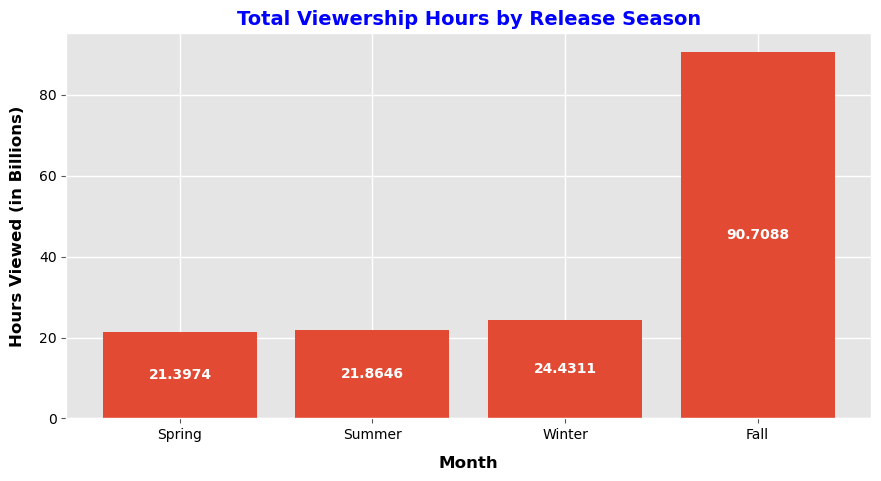

In [293]:
def get_season(month_number):
    if month_number in [12, 1, 2]:
        return 'Winter'
    elif month_number in [3, 4, 5]:
        return 'Spring'
    elif month_number in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['Season'] = df['Release Month'].apply(get_season)
temp_season = df.groupby('Season')['Hours Viewed'].sum().sort_values(ascending=True) / pow(10, 9)
temp_season = temp_season.reset_index()
temp_season.columns = ['Season', 'Hours Viewed (in Billions)']
plt.figure(figsize=(10, 6))
bars = plt.bar(x=temp_season['Season'], height=temp_season['Hours Viewed (in Billions)'])
plt.bar_label(bars, label_type='center', color='white', fontweight='bold')
plt.xlabel('Month', labelpad=10, fontweight='bold', color='black')
plt.ylabel('Hours Viewed (in Billions)', labelpad=10, fontweight='bold', color='black')
plt.xticks(fontweight='medium', color='black')
plt.yticks(fontweight='medium', color='black')
plt.title('Total Viewership Hours by Release Season', fontweight='bold', fontsize=14, color='blue')
plt.tight_layout(pad=5.0) 
plt.show()


- This shows that maximum consumption of content was seen in the season of Fall while in other season the hours viewed seems to be the same.

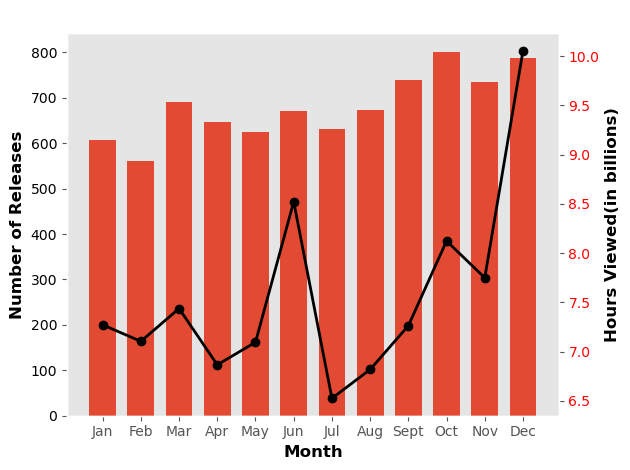

In [324]:
import numpy as np
import matplotlib.pyplot as plt


temp_release_month = df[['Release Month', 'Title']].groupby(by='Release Month')['Title'].count().reset_index()
temp_release_month.columns = ['month', 'number_of_release']
fig, ax1 = plt.subplots()
ax1.bar(temp_release_month['month'], temp_release_month['number_of_release'],width=0.7)
ax1.set_xlabel('Month', fontweight='bold', color='black')
ax1.set_ylabel('Number of Releases', fontweight='bold', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(False)
ax2 = ax1.twinx()
ax2.plot(temp_table_month_trend, marker='o', color='black')
ax2.set_ylabel('Hours Viewed(in billions)', fontweight='bold', color='black') 
ax2.tick_params(axis='y', labelcolor='red')
ax2.grid(False)
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45, fontweight='medium', color='black')
plt.title('Number of Releases and Another Metric by Month', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()


The number of Releases were steady throughout the year but the viewership sharply increases in dec and june.
It indicates that Hours viewed in not totally dependent on number of releases.

In [363]:
df['day']=df['Release Date'].dt.day_name()

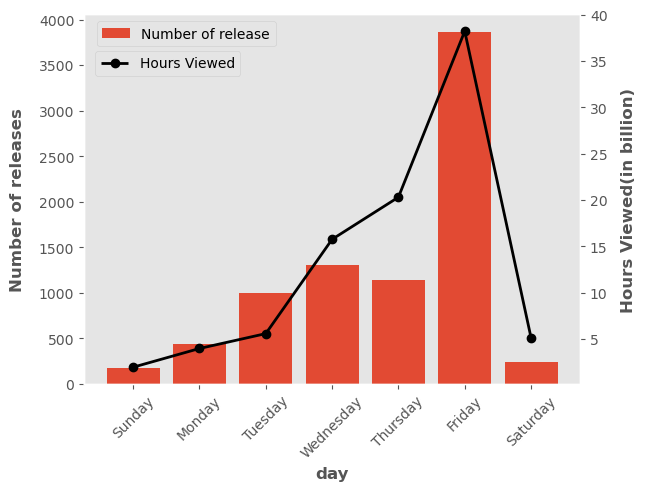

In [450]:
temp_data_day=df.groupby(by='day')['Title'].count().reset_index()
temp_data_day.columns=['day','Number_of_release']
temp_data_release_day=df.groupby(by='day')['Hours Viewed'].sum().reset_index()
temp_data_release_day.columns=['day','Hours Viewed']
day_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
temp_data_day.set_index('day',inplace=True)
temp_data_release_day.set_index('day',inplace=True)
temp_data_day=temp_data_day.reindex(day_order)
temp_data_release_day=temp_data_release_day.reindex(day_order)
fig,ax1=plt.subplots()
ax1.grid(False)
bars=ax1.bar(x=temp_data_day.index,height=temp_data_day['Number_of_release'],label='Number of release')
ax1.set_xlabel('day',fontweight='bold')
ax1.tick_params('x',rotation=45)
ax2=ax1.twinx()
ax2.grid(False)
lines=ax2.plot(temp_data_release_day.index,temp_data_release_day['Hours Viewed']/pow(10,9),color='black',marker='o',label='Hours Viewed')
ax2.set_ylabel('Hours Viewed(in billion)',fontweight='bold',labelpad=10)
ax1.set_ylabel('Number of releases',fontweight='bold',labelpad=10)
ax1.legend(bbox_to_anchor=(0.4,1),labelcolor='black')
ax2.legend(bbox_to_anchor=(0.329,0.92),labelcolor='black')

This shows that The in Friday the Number of release is Maximum and the rise in Viewership and content Consumption is Maximum.
Hence we may say that during the start of weekend , Viewed Hours depends and the consumer wished to watch the content on its released date. 